This is my first Python program in Jupyter Notebook

In [2]:
name = input("Enter your name")
print("hello ",name)

Enter your namesalomé
hello  salomé


In [4]:
print(name)

salomé


In [5]:
# Ce programme permet de tracer un contour d'un champ 2D natif
#import sys
#import cmocean
#import ast
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
from mpl_toolkits.basemap import Basemap, addcyclic
import matplotlib.font_manager as fm
from PIL import Image
import matplotlib.colors as col

In [6]:
file_OHC = "data/OHC_anom_201812_70-70_0-700_R19932014.nc"
image_OHC = "data/OHC_anom_201812_70-70_0-700_R19932014.png"


In [19]:
# Chargement fichier netcdf
file_in = nc4.Dataset(file_OHC, 'r', format='NETCDF4')

# Show Header: global attributes
#print(file_in)

title=file_in.title
print(title)

#Chargement des variables
longitude=file_in.variables['longitude'][:]
latitude=file_in.variables['latitude'][:]
variable=file_in.variables['ohc_glor'][:,:]
variable=np.where(variable.mask==True,np.nan,variable)

print ("Dimensions longitude",longitude.size)
print ("Dimensions latitude",latitude.size)
print ("Dimensions variable",variable.shape)


Ocean Heat Content201812 Anomaly (0-700m)
Dimensions longitude 1440
Dimensions latitude 681
Dimensions variable (681, 1440)


In [28]:
#Recuperation min et max
min_variable=np.nanmin(variable[:,:])
max_variable=np.nanmax(variable[:,:])
print ("min = ",min_variable)
print ("max = ",max_variable)

min_variable=-4000000000
max_variable=4000000000

# Utilisation de 30 couleurs
step=(max_variable-min_variable)/256
numlevs=np.arange(min_variable,max_variable+step/2,step)

min =  -21891105000.0
max =  15366856000.0


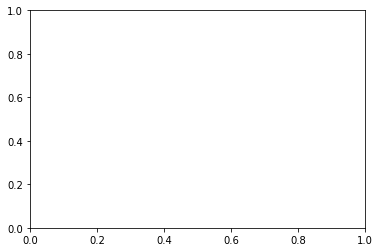

In [29]:
# Ouverture figure 1
fig = plt.figure()
ax = fig.add_subplot(111)




In [30]:
#On prepare le mask
#Projection ortho
m=Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='h')
#variable, long = addcyclic(variable, longitude)
long2,lati2=np.meshgrid(longitude,latitude)
long3,lati3=m(long2,lati2)

#print ("Dimensions long3",longitude.size)
#print ("Dimensions lati3",latitude.size)
#print ("Dimensions variable",variable.shape)



C:\Users\fmessal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


save image :  data/OHC_anom_201812_70-70_0-700_R19932014.png


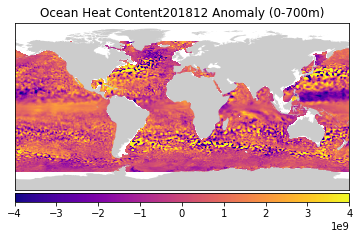

In [35]:
m.fillcontinents(color='#cccccc', lake_color='#cccccc')
m.drawcoastlines(color='#cccccc',linewidth=0.05)
#cs=plt.contourf(longitude,latitude,variable,numlevs,cmap='plasma',extend='both')
cs=plt.pcolormesh(longitude,latitude,variable,cmap='plasma',vmin=min_variable,vmax=max_variable)
#Add color scale
Cb = m.colorbar(cs, "bottom")
plt.title(title, fontsize=12)

fig.patch.set_visible(False)
ax.axis('off')
plt.savefig(image_OHC,dpi=800,pad_inches=0)
print("save image : ",image_OHC)
#plt.show()

In [ ]:

# On affiche la figure

#img_map = Image.open(ficout)
#image_background='/home/fmessal/ipython/anims/elements/backgrounds/background_4960x2479_black_ice.jpg'
#img_back = Image.open(image_background)
#img_back.paste(img_map, (-800,-1185), img_map)
#img_back = img_back.resize((4096,2048), Image.ANTIALIAS)
#img_back.save(ficout_merge, "PNG")